In [24]:
import numpy as np
import matplotlib.pyplot as plt
import enzyme_utils_new as utils
import scipy.stats as stats
import scipy
from sklearn.neighbors import KernelDensity

%config InlineBackend.figure_format='retina'

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PPCs to select BM tracks

We apply PPCs in $max(\bar{r})_{\tau=3, 4}$ and $msd(\tau)$ to select what we believed to be tracks generated from BM. 

In [16]:
data_dir = ['new_data/transformed_buffer/', 'new_data/transformed_10uM/',  'new_data/transformed_100uM/', 
            'new_data/transformed_1mM/', 'new_data/transformed_10mM/', 'new_data/transformed_100mM/']

enzymes = utils.enzymeBayes(data_dir, ml=20, jump=3)

15 files; 234 trajectories (length >= 20); Total 19117 data points
23 files; 116 trajectories (length >= 20); Total 8442 data points
37 files; 324 trajectories (length >= 20); Total 19651 data points
27 files; 403 trajectories (length >= 20); Total 32292 data points
33 files; 261 trajectories (length >= 20); Total 16986 data points
38 files; 326 trajectories (length >= 20); Total 18992 data points


In [17]:
la = ['buffer', '10um', '100um', '1mm', '10mm', '100mm']

## maxdis

In [4]:
test_eval = [['self.tq_maxdis', ['sdt', '4']], 
             ['self.tq_maxdis', ['sdt', '3']], 
             ['self.tq_maxdis', ['sdt', '2']]]

ml = 20
p_tot = []

for ii in range(6):
    sel_ind = np.array([i for i in range(len(enzymes.tot_track_info[ii]))])
    ranking, tl, index, map_, avg_dt = enzymes.rank(ii, sel_ind, ml=ml)
    threshold_ind = np.where(np.array(ranking) >= 0)[0]
    final_sel_ind = np.array(np.array(index)[threshold_ind]).astype(int)

    a, b = 1, 1
    
    p_tot.append(enzymes.p_value_disp(ii, test_eval, final_sel_ind, a=a, b=b))
    print(la[ii] + ' done')

buffer done
10um done
100um done
1mm done
10mm done
100mm done


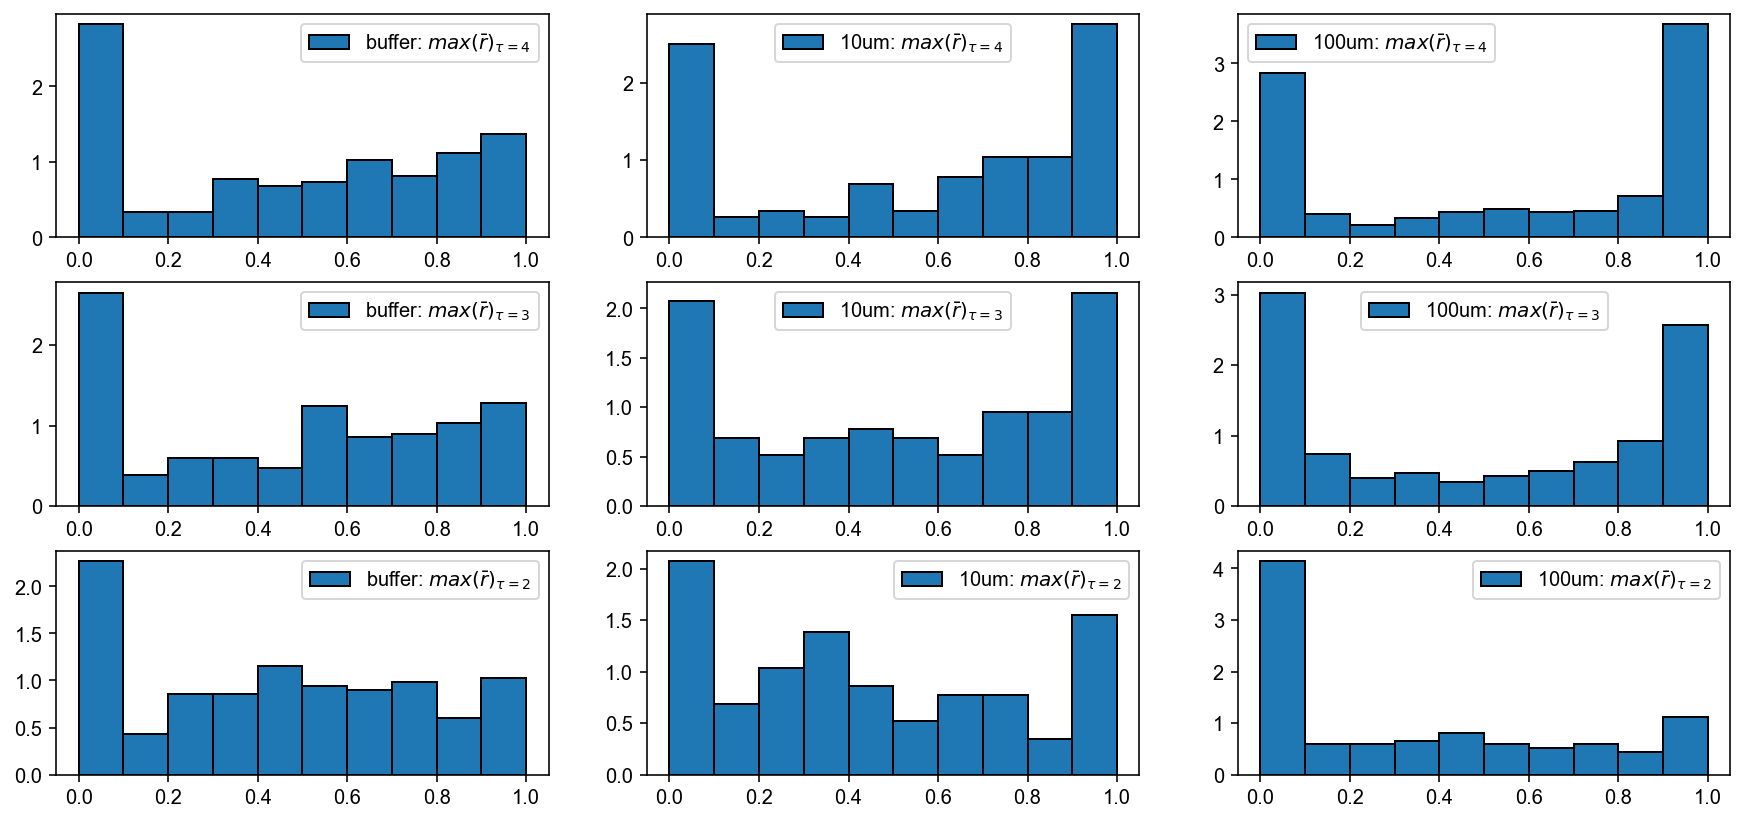

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
count = 0

# buffer, 10um, 100mm
for i in range(3):
    for j in range(3):
        axes[j, i].hist(p_tot[count][:, j], bins=10, density=True,
                        edgecolor='black', label=la[count] + ': '+r'$max(\bar{r})_{\tau=%d}$' %(4-j))
        axes[j, i].legend()
    count += 1

plt.show()

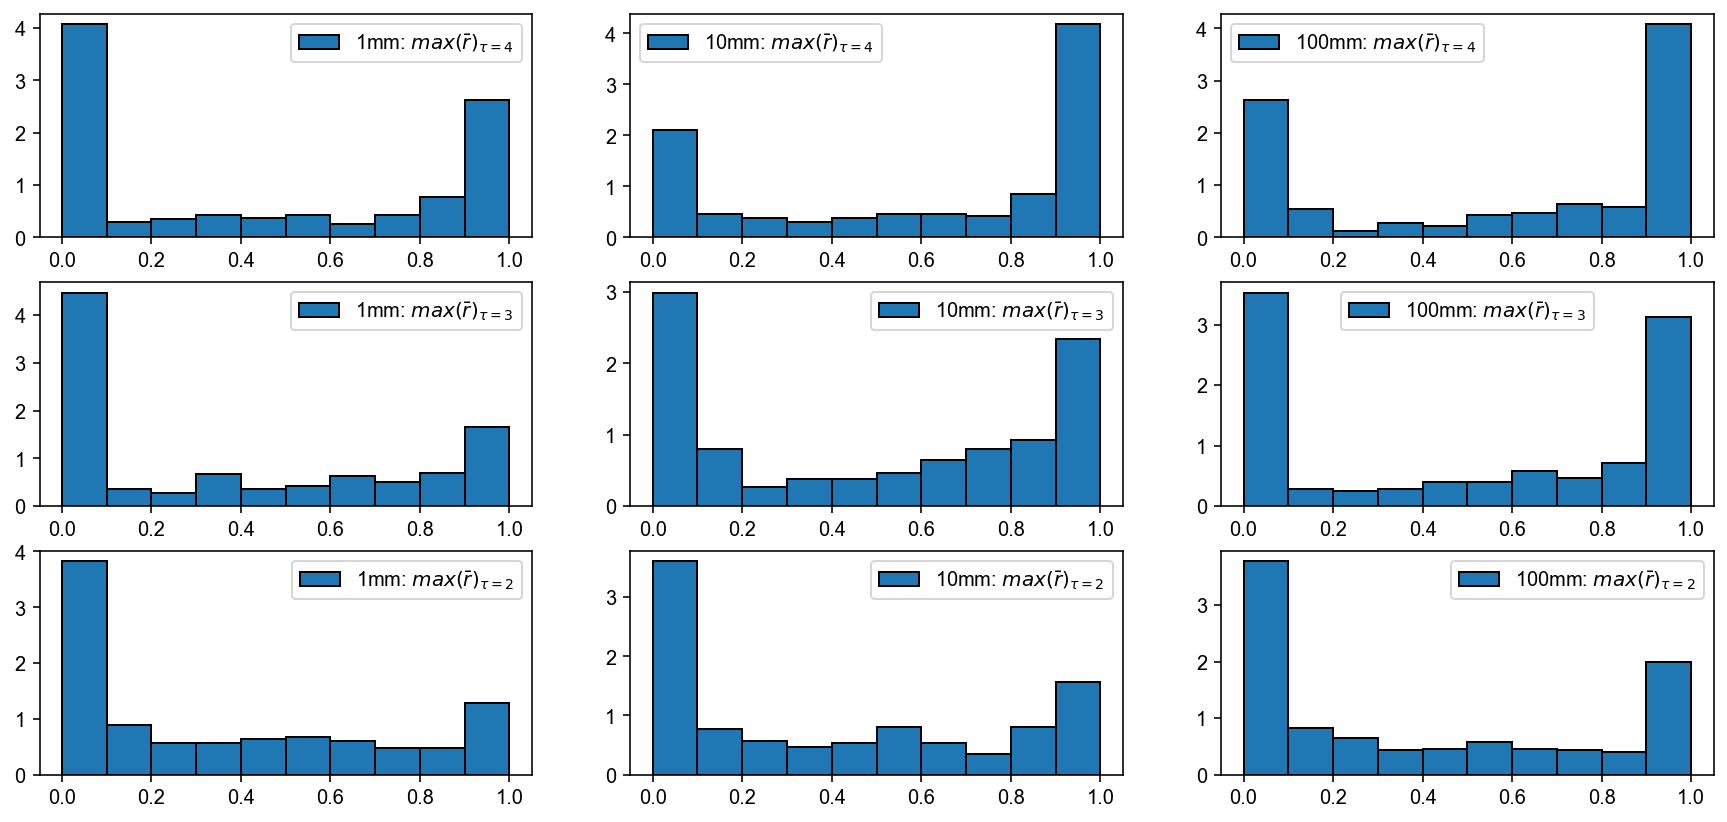

In [33]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
count = 3

# buffer, 10um, 100mm
for i in range(3):
    for j in range(3):
        axes[j, i].hist(p_tot[count][:, j], bins=10, density=True,
                        edgecolor='black', label=la[count] + ': '+r'$max(\bar{r})_{\tau=%d}$' %(4-j))
        axes[j, i].legend()
    count += 1

plt.show()

In [18]:
enzymes.ignoreLongJump()

## MSD

In [19]:
test_eval = [['self.tq_msd', ['sdt', '2']], 
             ['self.tq_msd', ['sdt', '3']], 
             ['self.tq_msd', ['sdt', '4']]]

ml = 20
p_tot = []

for ii in range(6):

    a, b = 1, 1
    
    sel_ind = np.array([i for i in range(len(enzymes.tot_track_info[ii]))])
    ranking, tl, index, map_, avg_dt = enzymes.rank(ii, sel_ind, ml=20)
    threshold_ind = np.where(np.array(ranking) >= 0)[0]
    final_sel_ind = np.array(np.array(index)[threshold_ind]).astype(int)    
    
    p_tot.append(enzymes.p_value_disp(ii, test_eval, final_sel_ind, a=a, b=b))
    print(la[ii] + ' done')

buffer done
10um done
100um done
1mm done
10mm done
100mm done


In [21]:
# filter
xx = []
for ii in range(6):
    
    sel_ind = np.array([i for i in range(len(enzymes.tot_track_info[ii]))])
    ranking, tl, index, map_, avg_dt = enzymes.rank(ii, sel_ind, ml=20)
    threshold_ind = np.where(np.array(ranking) >= 0)[0]
    final_sel_ind = np.array(np.array(index)[threshold_ind]).astype(int)   
    
    # use tau = 2,3,4 as filter
    sel_2 = final_sel_ind[np.where(p_tot[ii][:, 0] >= 0.05)[0]]
    sel_3 = final_sel_ind[np.where(p_tot[ii][:, 1] >= 0.05)[0]]
    sel_4 = final_sel_ind[np.where(p_tot[ii][:, 2] >= 0.05)[0]]
    
    xx.append(list(set(sel_2)&set(sel_3)&set(sel_4)))

In [8]:
for i in range(6):
    np.savetxt('temp_save/BI_'+la[i]+'.txt', enzymes.BI[i])

In [23]:
for i in range(6):
    np.savetxt('temp_save/sel_'+la[i]+'.txt', xx[i])

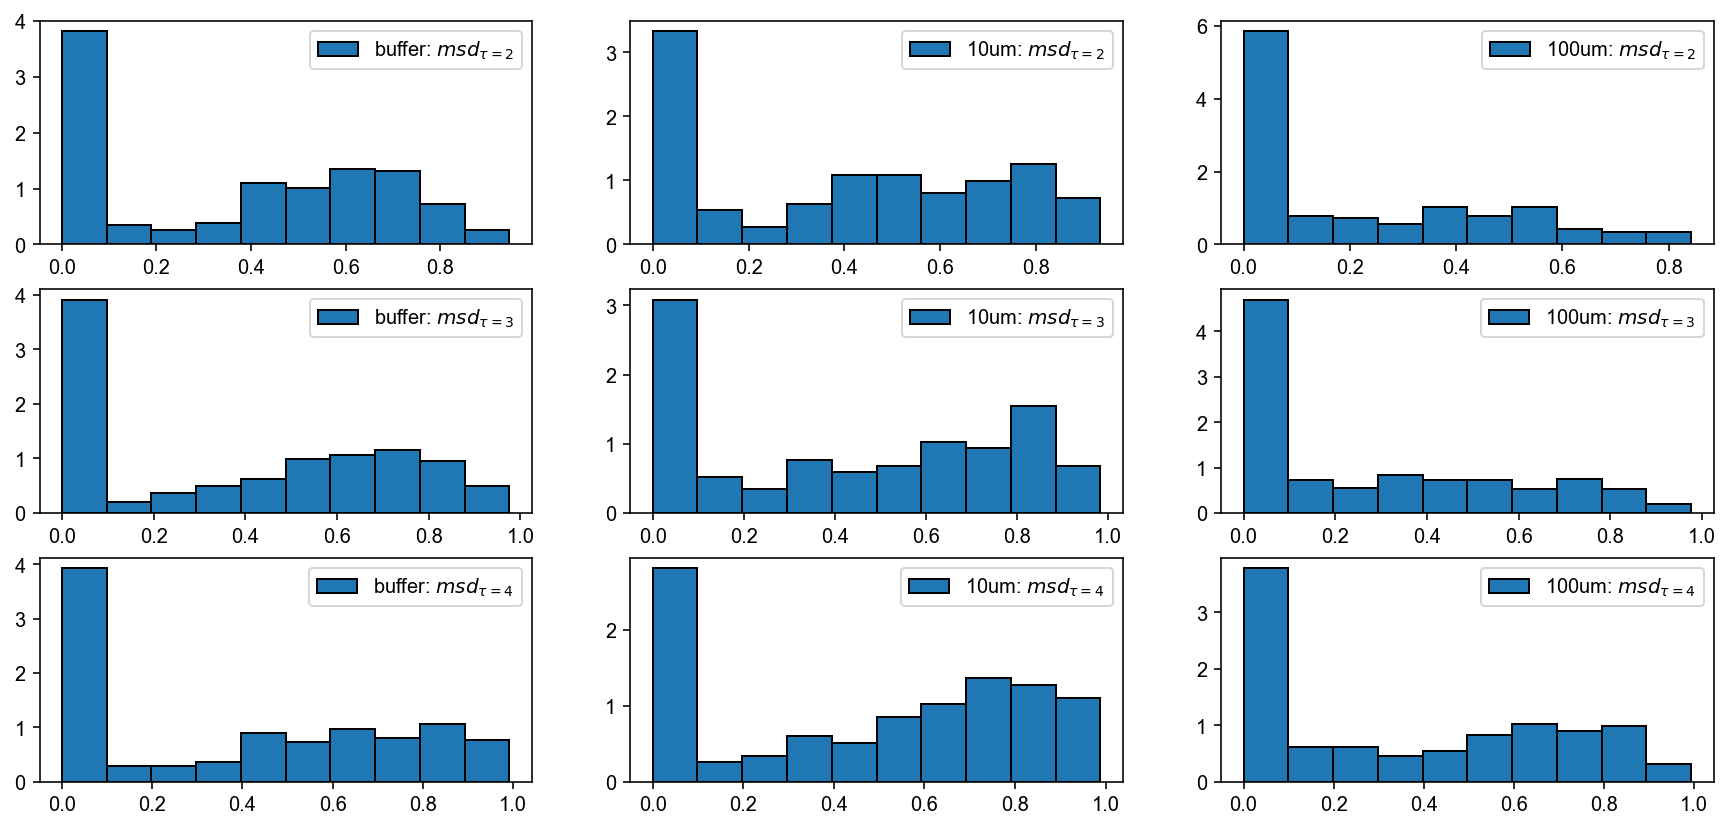

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
count = 0

# buffer, 10um, 100mm
for i in range(3):
    for j in range(3):
        axes[j, i].hist(p_tot[count][:, j], bins=10, density=True,
                        edgecolor='black', label=la[count] + ': '+r'$msd_{\tau=%d}$' %(j+2))
        axes[j, i].legend()
    count += 1

plt.show()

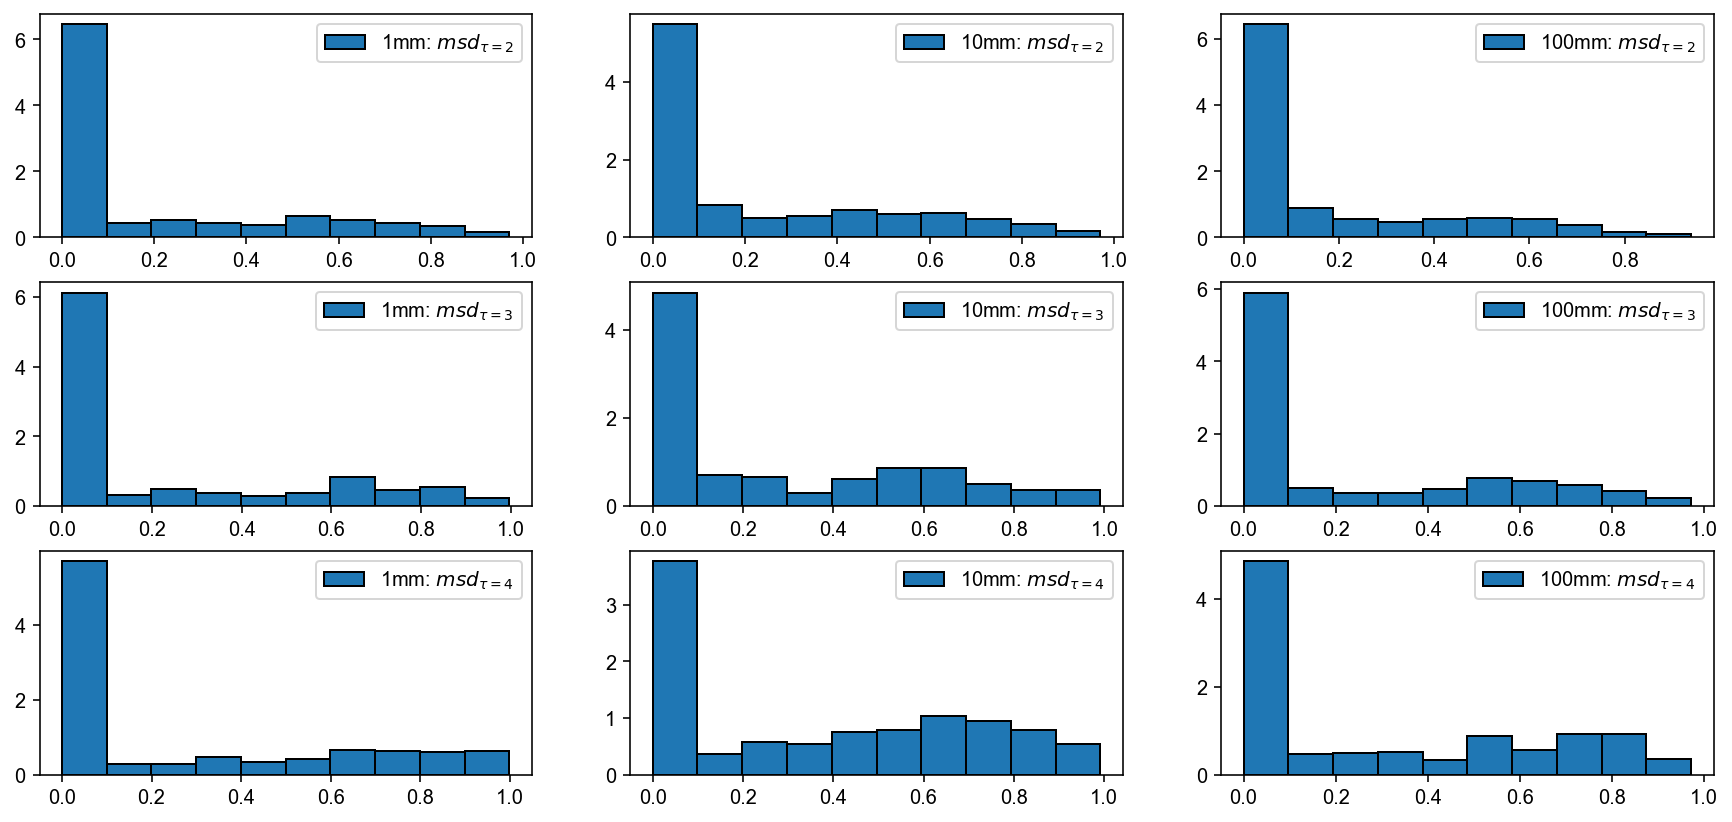

In [40]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
count = 3

# 1mm, 10mm, 100mm
for i in range(3):
    for j in range(3):
        axes[j, i].hist(p_tot[count][:, j], bins=10, density=True,
                        edgecolor='black', label=la[count] + ': '+r'$msd_{\tau=%d}$' %(j+2))
        axes[j, i].legend()
    count += 1

plt.show()

In [41]:
test_eval = [['self.tq_maxdis', ['sdt', '4']], 
             ['self.tq_maxdis', ['sdt', '3']], 
             ['self.tq_maxdis', ['sdt', '2']]]

ml = 20
p_tot = []

for ii in range(6):

    a, b = 1, 1
    
    p_tot.append(enzymes.p_value_disp(ii, test_eval, xx[ii], a=a, b=b))
    print(la[ii] + ' done')

buffer done
10um done
100um done
1mm done
10mm done
100mm done


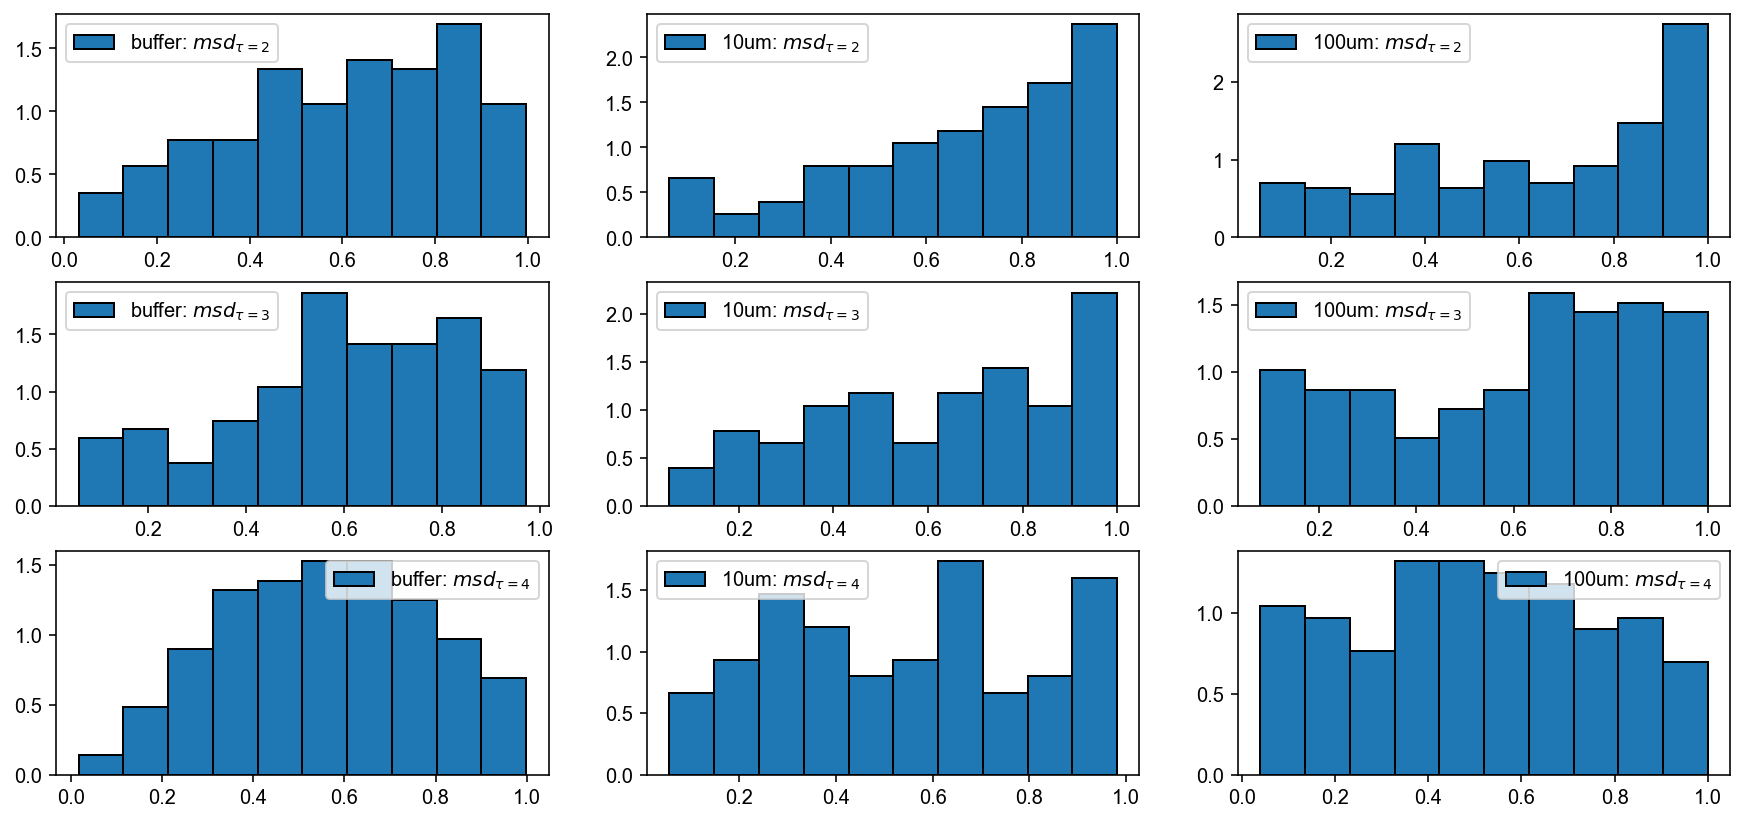

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
count = 0

# buffer, 10um, 100mm
for i in range(3):
    for j in range(3):
        axes[j, i].hist(p_tot[count][:, j], bins=10, density=True,
                        edgecolor='black', label=la[count] + ': '+r'$msd_{\tau=%d}$' %(j+2))
        axes[j, i].legend()
    count += 1

plt.show()

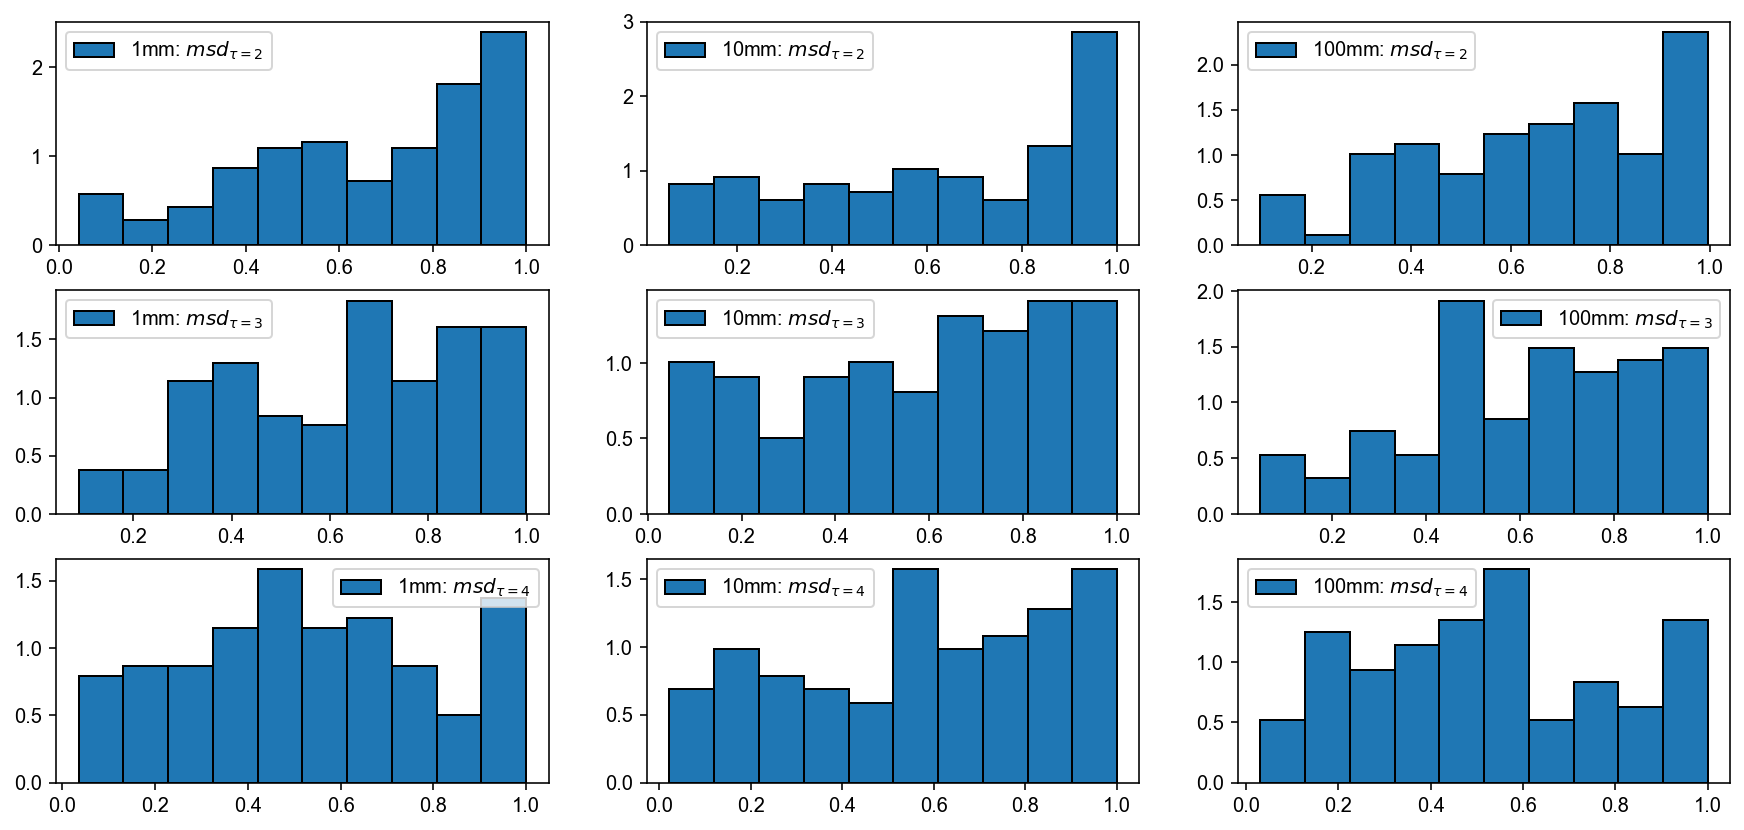

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(15, 7))
count = 3

# 1mm, 10mm, 100mm
for i in range(3):
    for j in range(3):
        axes[j, i].hist(p_tot[count][:, j], bins=10, density=True,
                        edgecolor='black', label=la[count] + ': '+r'$msd_{\tau=%d}$' %(j+2))
        axes[j, i].legend()
    count += 1

plt.show()